# Project Scope


**Goal:** Improve company performance internally.






**Objective::** To confirm that ~5% employees have been promoted in the company for the particular year.

# Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import warnings
import plotly.express as px
import plotly.graph_objects as go
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
warnings.filterwarnings('ignore')
%matplotlib inline
plt.rcParams['figure.figsize'] = (20,10)
plt.style.use("ggplot")

df = pd.read_csv("/content/drive/MyDrive/DATASET/hr_train.csv")

In [2]:
df.shape

(54808, 14)

In [3]:
df.head(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,0,73,0
5,58896,Analytics,region_2,Bachelor's,m,sourcing,2,31,3.0,7,0,0,85,0
6,20379,Operations,region_20,Bachelor's,f,other,1,31,3.0,5,0,0,59,0
7,16290,Operations,region_34,Master's & above,m,sourcing,1,33,3.0,6,0,0,63,0
8,73202,Analytics,region_20,Bachelor's,m,other,1,28,4.0,5,0,0,83,0
9,28911,Sales & Marketing,region_1,Master's & above,m,sourcing,1,32,5.0,5,1,0,54,0


In [4]:
df.tail(10)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
54798,40257,Sales & Marketing,region_2,Master's & above,f,other,2,40,5.0,4,1,0,51,0
54799,68093,Procurement,region_2,Master's & above,f,other,1,50,5.0,6,1,1,67,0
54800,39227,HR,region_11,Bachelor's,m,other,2,34,5.0,3,0,0,52,0
54801,12431,Technology,region_26,Bachelor's,f,sourcing,1,31,NaN,1,0,0,78,0
54802,6915,Sales & Marketing,region_14,Bachelor's,m,other,2,31,1.0,2,0,0,49,0
54803,3030,Technology,region_14,Bachelor's,m,sourcing,1,48,3.0,17,0,0,78,0
54804,74592,Operations,region_27,Master's & above,f,other,1,37,2.0,6,0,0,56,0
54805,13918,Analytics,region_1,Bachelor's,m,other,1,27,5.0,3,1,0,79,0
54806,13614,Sales & Marketing,region_9,NaN,m,sourcing,1,29,1.0,2,0,0,45,0
54807,51526,HR,region_22,Bachelor's,m,other,1,27,1.0,5,0,0,49,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             52399 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  50684 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [6]:
df.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

In [7]:
lowest_avg_training_score = df['avg_training_score'].min()
highest_avg_training_score = df['avg_training_score'].max()

lowest_no_of_trainings = df['no_of_trainings'].min()
highest_no_of_trainings = df['no_of_trainings'].max()

print("Lowest avg training score: " , lowest_avg_training_score ,"\nHighest avg training score: ", highest_avg_training_score,
      "\nLowest no of trainings: ", lowest_no_of_trainings, "\nHighest no of trainings: ", highest_no_of_trainings)

Lowest avg training score:  39 
Highest avg training score:  99 
Lowest no of trainings:  1 
Highest no of trainings:  10


In [8]:
df.describe(include='all')

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
count,54808.000000,54808,54808,52399,54808,54808,54808.000000,54808.000000,50684.000000,54808.000000,54808.000000,54808.000000,54808.000000,54808.000000
unique,NaN,9,34,3,2,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Sales & Marketing,region_2,Bachelor's,m,other,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,16840,12343,36669,38496,30446,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,39195.830627,NaN,NaN,NaN,NaN,NaN,1.253011,34.803915,3.329256,5.865512,0.351974,0.023172,63.386750,0.085170
std,22586.581449,NaN,NaN,NaN,NaN,NaN,0.609264,7.660169,1.259993,4.265094,0.477590,0.150450,13.371559,0.279137
min,1.000000,NaN,NaN,NaN,NaN,NaN,1.000000,20.000000,1.000000,1.000000,0.000000,0.000000,39.000000,0.000000
25%,19669.750000,NaN,NaN,NaN,NaN,NaN,1.000000,29.000000,3.000000,3.000000,0.000000,0.000000,51.000000,0.000000
50%,39225.500000,NaN,NaN,NaN,NaN,NaN,1.000000,33.000000,3.000000,5.000000,0.000000,0.000000,60.000000,0.000000
75%,58730.500000,NaN,NaN,NaN,NaN,NaN,1.000000,39.000000,4.000000,7.000000,1.000000,0.000000,76.000000,0.000000


In [9]:
df.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [10]:
df.duplicated().sum()

0

In [11]:
df.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

**Categorical columns:**<br>
department<br>
region<br>
education<br>
gender<br>
recruitment_channel<br>

**Numerical columns:**<br>
no_of_trainings<br>
age<br>
previous_year_rating<br>
length_of_service<br>
KPIs_met >80%<br>
awards_won?<br>
avg_training_score<br>
is_promoted<br>
employee_id<br>



In [12]:
df.nunique()

employee_id             54808
department                  9
region                     34
education                   3
gender                      2
recruitment_channel         3
no_of_trainings            10
age                        41
previous_year_rating        5
length_of_service          35
KPIs_met >80%               2
awards_won?                 2
avg_training_score         61
is_promoted                 2
dtype: int64

In [13]:
df.drop(['employee_id'],axis=1,inplace=True)

In [14]:
df.shape

(54808, 13)

In [15]:
df.columns

Index(['department', 'region', 'education', 'gender', 'recruitment_channel',
       'no_of_trainings', 'age', 'previous_year_rating', 'length_of_service',
       'KPIs_met >80%', 'awards_won?', 'avg_training_score', 'is_promoted'],
      dtype='object')

In [16]:
df.dtypes

department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
KPIs_met >80%             int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [17]:
df.select_dtypes(['int64', 'float64'])

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,1,35,5.0,8,1,0,49,0
1,1,30,5.0,4,0,0,60,0
2,1,34,3.0,7,0,0,50,0
3,2,39,1.0,10,0,0,50,0
4,1,45,3.0,2,0,0,73,0
...,...,...,...,...,...,...,...,...
54803,1,48,3.0,17,0,0,78,0
54804,1,37,2.0,6,0,0,56,0
54805,1,27,5.0,3,1,0,79,0
54806,1,29,1.0,2,0,0,45,0


In [18]:
numerical_variables = df.select_dtypes(['int64','float64']).drop('is_promoted',axis=1).columns
numerical_variables = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']
df[numerical_variables].corr(method='spearman')

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
no_of_trainings,1.000000,-0.085677,-0.058165,-0.056892,-0.041205,-0.007262,0.052676
age,-0.085677,1.000000,0.011070,0.644444,-0.016305,-0.006439,-0.041001
previous_year_rating,-0.058165,0.011070,1.000000,0.002770,0.359579,0.028011,0.076806
length_of_service,-0.056892,0.644444,0.002770,1.000000,-0.064919,-0.035700,-0.028860
KPIs_met >80%,-0.041205,-0.016305,0.359579,-0.064919,1.000000,0.097000,0.087068
awards_won?,-0.007262,-0.006439,0.028011,-0.035700,0.097000,1.000000,0.060719
avg_training_score,0.052676,-0.041001,0.076806,-0.028860,0.087068,0.060719,1.000000


In [19]:
df.mode()

,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,Sales & Marketing,region_2,Bachelor's,m,other,1,30,3.0,3,0,0,50,0


# Question 1: Employee's Age Distribution.

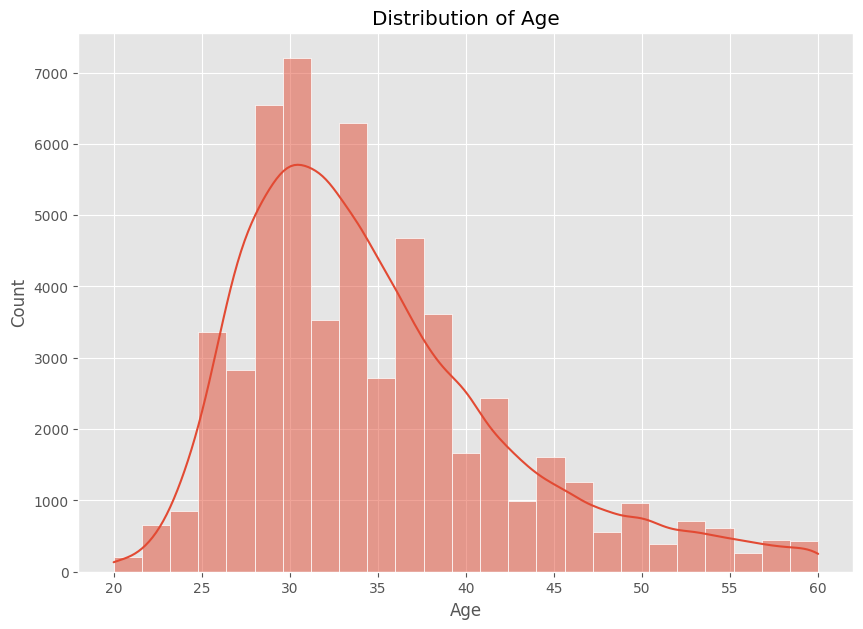

In [20]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
sns.set_style("whitegrid")
sns.set_palette(["#33a02c"])
sns.histplot(data=df, x='age', bins=25, ax=ax, kde=True)
plt.xlabel('Age')
ax.set_title("Distribution of Age")
plt.show()

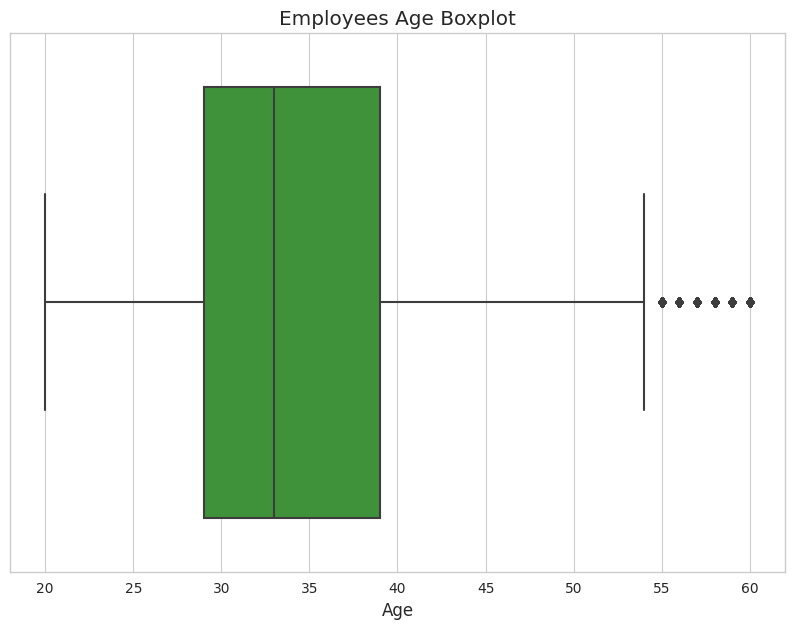

In [21]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
sns.set_style("whitegrid")
sns.boxplot(data=df, x='age', ax=ax)
plt.xlabel('Age')
plt.title('Employees Age Boxplot')
plt.show()

In [22]:
age_mean = df['age'].mean()
print('Average age is: ', age_mean)

Average age is:  34.80391548679025


In [23]:
age_median = df['age'].median()
print('Median age is: ', age_median)

Median age is:  33.0


In [24]:
q1,q3 = df['age'].quantile([0.25,0.75])
print('Quartile 1:',q1,'\nQuartile 3:',q3)

Quartile 1: 29.0 
Quartile 3: 39.0


In [25]:
iqr = q3 - q1
print('Interquartile Range:',iqr)

Interquartile Range: 10.0


In [26]:
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print('Lower Fence: ',lower_fence,'\nUpper Fence: ',upper_fence)

Lower Fence:  14.0 
Upper Fence:  54.0


In [27]:
df[(df["age"] < 14) | (df["age"] > 54)].count()

department              1435
region                  1435
education               1401
gender                  1435
recruitment_channel     1435
no_of_trainings         1435
age                     1435
previous_year_rating    1435
length_of_service       1435
KPIs_met >80%           1435
awards_won?             1435
avg_training_score      1435
is_promoted             1435
dtype: int64

# Question 2: Average years of service

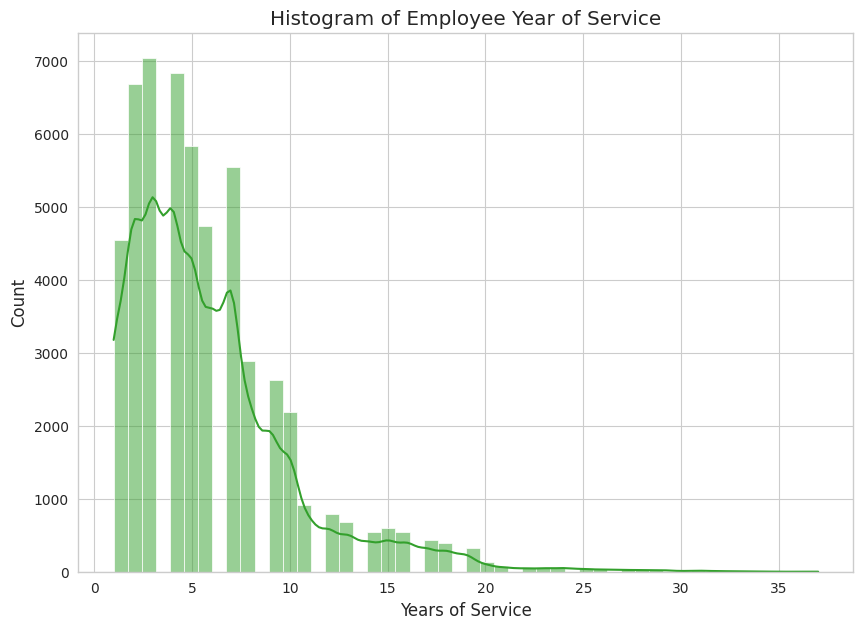

In [28]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
sns.set_style("whitegrid")
sns.set_palette(["#1f78b4", "#b2df8a"])
sns.histplot(data=df, x='length_of_service', bins=50, ax=ax, kde=True)
plt.xlabel('Years of Service')
ax.set_title('Histogram of Employee Year of Service')
plt.show()

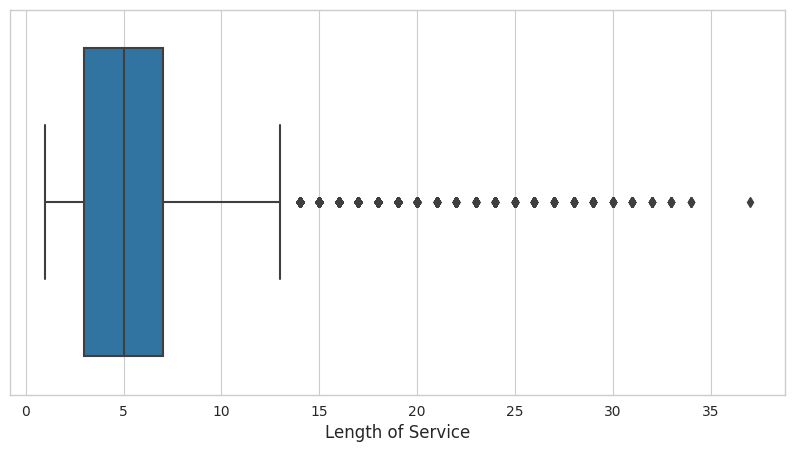

In [29]:
fig,ax = plt.subplots(1,1,figsize = (10,5))
sns.set_palette(["#1f78b4", "#b2df8a"])
sns.boxplot(data=df, x='length_of_service', ax=ax)
plt.xlabel('Length of Service')
plt.show()

In [30]:
LoS_mean = df['length_of_service'].mean()
print('Average years of service is: ', LoS_mean)

Average years of service is:  5.865512333965844


In [31]:
LoS_median = df['length_of_service'].median()
print('Median years of service is:', LoS_median)

Median years of service is: 5.0


In [32]:
q1,q3 = df['length_of_service'].quantile([0.25,0.75])
print('Quartile 1:',q1,'\nQuartile 3:',q3)

Quartile 1: 3.0 
Quartile 3: 7.0


In [33]:
iqr = q3 - q1
print('Interquartile Range:',iqr)

Interquartile Range: 4.0


In [34]:
lower_fence = q1 - (1.5*iqr)
upper_fence = q3 + (1.5*iqr)
print('Lower Fence: ',lower_fence,'\nUpper Fence: ',upper_fence)

Lower Fence:  -3.0 
Upper Fence:  13.0


In [35]:
df[(df["length_of_service"] < -3) | (df["length_of_service"] > 13)].count()

department              3489
region                  3489
education               3414
gender                  3489
recruitment_channel     3489
no_of_trainings         3489
age                     3489
previous_year_rating    3489
length_of_service       3489
KPIs_met >80%           3489
awards_won?             3489
avg_training_score      3489
is_promoted             3489
dtype: int64

In [36]:
min = df['length_of_service'].min()
max = df['length_of_service'].max()
print('Min: ',min , '\nMax :', max)

Min:  1 
Max : 37


# Question 3: Distribution of employees' gender

In [37]:
color = ["#1f78b4", "#fb9a99"]
fig = px.pie(df.gender, values=df.gender.value_counts().values, names=['male','female'],title='Distribution of Gender',color_discrete_sequence=color)
fig.update_layout(width=600, height=400)
fig.show()

In [38]:
df_gender = df.groupby('gender')
df_gender.mean()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,,,,,,,,
f,1.173921,34.995647,3.376006,5.994421,0.379414,0.022621,63.889897,0.089934
m,1.286523,34.722672,3.309316,5.810889,0.340347,0.023405,63.173550,0.083151


In [39]:
df_gender.sum()

,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
gender,,,,,,,,
f,19149,570849,51160.0,97781,6189,369,1042172,1467
m,49526,1336684,117580.0,223696,13102,901,2431929,3201


# Question 4: Percentage of Employee promoted

In [40]:
df.is_promoted.value_counts()

0    50140
1     4668
Name: is_promoted, dtype: int64

In [41]:
color = ["#1f78b4", "#33a02c"]
fig = px.pie(df.is_promoted, values=df.is_promoted.value_counts().values, names=['Not Promoted','Promoted'],title='Percentage of Promoted Employee',color_discrete_sequence=color)
fig.update_layout(width=500, height=400)
fig.show()

# Question 5: Which department has the highest number that've been promoted?

In [42]:
df_subset = df[['department','is_promoted']]
df_subset

,department,is_promoted
0,Sales & Marketing,0
1,Operations,0
2,Sales & Marketing,0
3,Sales & Marketing,0
4,Technology,0
...,...,...
54803,Technology,0
54804,Operations,0
54805,Analytics,0
54806,Sales & Marketing,0


In [43]:
df_dept_promoted = df_subset[df_subset['is_promoted']==1]
df_dept_promoted

,department,is_promoted
11,Sales & Marketing,1
39,Sales & Marketing,1
60,Sales & Marketing,1
66,Finance,1
67,Sales & Marketing,1
...,...,...
54734,Operations,1
54757,Technology,1
54761,Procurement,1
54792,Sales & Marketing,1


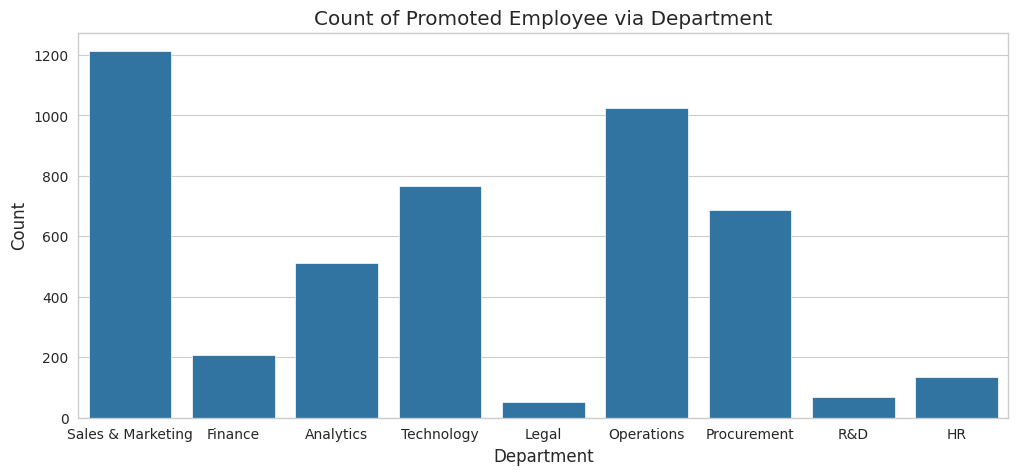

In [44]:
plt.figure(figsize = (12, 5))
color = ["#1f78b4"]
sns.countplot(data=df_dept_promoted, x='department', palette = color)
plt.xlabel('Department')
plt.ylabel('Count')
plt.title('Count of Promoted Employee via Department')
plt.show()

In [45]:
df_dept_promoted.groupby('department').value_counts()

department         is_promoted
Analytics          1               512
Finance            1               206
HR                 1               136
Legal              1                53
Operations         1              1023
Procurement        1               688
R&D                1                69
Sales & Marketing  1              1213
Technology         1               768
dtype: int64

# Question 6: What is the education level for employee in Sales & Marketing that've been promoted?

In [46]:
df_subset = df[['department','is_promoted', 'education']]
df_subset

,department,is_promoted,education
0,Sales & Marketing,0,Master's & above
1,Operations,0,Bachelor's
2,Sales & Marketing,0,Bachelor's
3,Sales & Marketing,0,Bachelor's
4,Technology,0,Bachelor's
...,...,...,...
54803,Technology,0,Bachelor's
54804,Operations,0,Master's & above
54805,Analytics,0,Bachelor's
54806,Sales & Marketing,0,NaN


In [47]:
SnM = df_subset[df_subset['department']=='Sales & Marketing']
SnM

,department,is_promoted,education
0,Sales & Marketing,0,Master's & above
2,Sales & Marketing,0,Bachelor's
3,Sales & Marketing,0,Bachelor's
9,Sales & Marketing,0,Master's & above
11,Sales & Marketing,1,Bachelor's
...,...,...,...
54796,Sales & Marketing,1,Master's & above
54797,Sales & Marketing,0,Bachelor's
54798,Sales & Marketing,0,Master's & above
54802,Sales & Marketing,0,Bachelor's


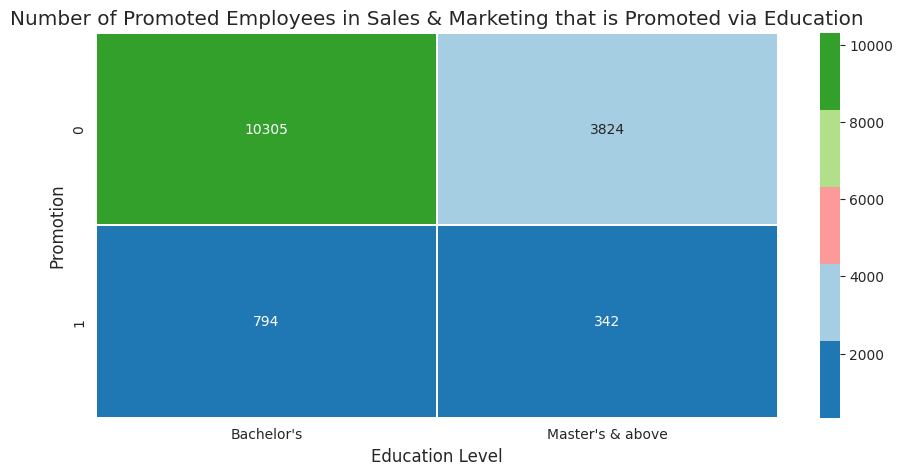

In [48]:
cross = pd.crosstab(SnM.is_promoted, SnM.education)
plt.figure(figsize = (11, 5))
custom_hue = ["#1f78b4","#a6cee3", "#fb9a99","#b2df8a", "#33a02c"]
sns.heatmap(cross,annot=True,linewidth=1.1,fmt = '2.0f',cmap=custom_hue)
plt.xlabel('Education Level')
plt.ylabel('Promotion')
plt.title('Number of Promoted Employees in Sales & Marketing that is Promoted via Education')
plt.show()

# Question 7: Distribution of gender in Sales & Marketing department that is promoted.

In [49]:
df_subset = df[['department','is_promoted', 'gender']]
df_subset

,department,is_promoted,gender
0,Sales & Marketing,0,f
1,Operations,0,m
2,Sales & Marketing,0,m
3,Sales & Marketing,0,m
4,Technology,0,m
...,...,...,...
54803,Technology,0,m
54804,Operations,0,f
54805,Analytics,0,m
54806,Sales & Marketing,0,m


In [50]:
SnM = df_subset[df_subset['department']=='Sales & Marketing']
SnM

,department,is_promoted,gender
0,Sales & Marketing,0,f
2,Sales & Marketing,0,m
3,Sales & Marketing,0,m
9,Sales & Marketing,0,m
11,Sales & Marketing,1,f
...,...,...,...
54796,Sales & Marketing,1,m
54797,Sales & Marketing,0,m
54798,Sales & Marketing,0,f
54802,Sales & Marketing,0,m


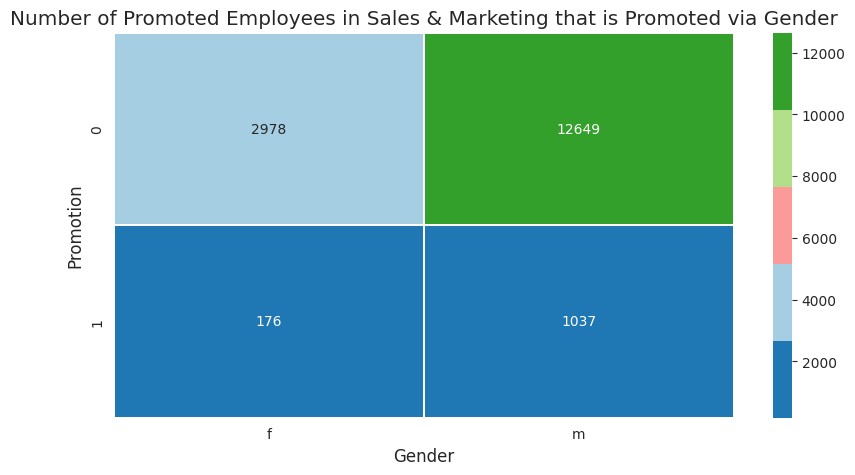

In [51]:
cross = pd.crosstab(SnM.is_promoted, SnM.gender)
plt.figure(figsize = (10, 5))
custom_hue = ["#1f78b4","#a6cee3", "#fb9a99","#b2df8a", "#33a02c"]
sns.heatmap(cross,annot=True,linewidth=1.1,fmt = '2.0f',cmap=custom_hue)
plt.xlabel('Gender')
plt.ylabel('Promotion')
plt.title('Number of Promoted Employees in Sales & Marketing that is Promoted via Gender')
plt.show()

#Question 8: Which department having highest female promoted?

In [52]:
df_subset = df[['department','is_promoted', 'gender']]
df_subset = df_subset[df_subset['is_promoted']==1]
df_subset

,department,is_promoted,gender
11,Sales & Marketing,1,f
39,Sales & Marketing,1,m
60,Sales & Marketing,1,m
66,Finance,1,m
67,Sales & Marketing,1,m
...,...,...,...
54734,Operations,1,m
54757,Technology,1,m
54761,Procurement,1,f
54792,Sales & Marketing,1,m


In [53]:
gender_f = df_subset[df_subset['gender']=='f']
gender_f

,department,is_promoted,gender
11,Sales & Marketing,1,f
85,Operations,1,f
113,Sales & Marketing,1,f
118,Procurement,1,f
151,Technology,1,f
...,...,...,...
54424,Sales & Marketing,1,f
54522,Sales & Marketing,1,f
54643,Operations,1,f
54695,Operations,1,f


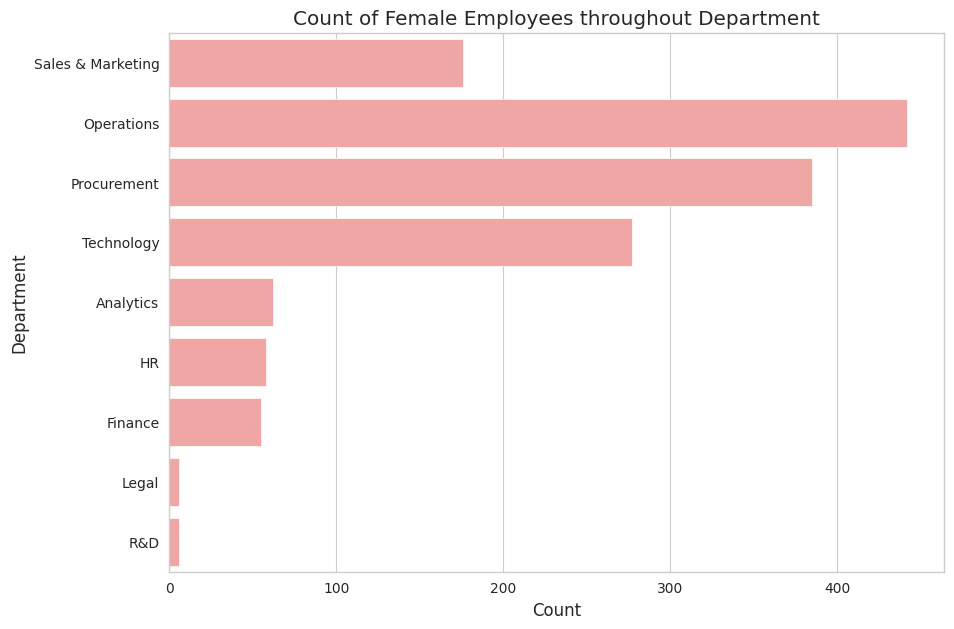

In [54]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
color = ["#fb9a99"]
sns.set_style("whitegrid")
sns.countplot(data=gender_f, y='department', palette=color)
plt.ylabel('Department')
plt.xlabel('Count')
plt.title('Count of Female Employees throughout Department')
plt.show()

In [55]:
gender_f.groupby('department').value_counts()

department         is_promoted  gender
Analytics          1            f          62
Finance            1            f          55
HR                 1            f          58
Legal              1            f           6
Operations         1            f         442
Procurement        1            f         385
R&D                1            f           6
Sales & Marketing  1            f         176
Technology         1            f         277
dtype: int64

#Question 9: What is the majority education level for those whom being promoted?

In [56]:
df_subset = df[['education', 'is_promoted']]
df_subset

,education,is_promoted
0,Master's & above,0
1,Bachelor's,0
2,Bachelor's,0
3,Bachelor's,0
4,Bachelor's,0
...,...,...
54803,Bachelor's,0
54804,Master's & above,0
54805,Bachelor's,0
54806,NaN,0


In [57]:
edulevel_promoted = df_subset[df_subset['is_promoted'] == 1]
edulevel_promoted

,education,is_promoted
11,Bachelor's,1
39,Bachelor's,1
60,Master's & above,1
66,Bachelor's,1
67,Bachelor's,1
...,...,...
54734,Bachelor's,1
54757,Master's & above,1
54761,Bachelor's,1
54792,Bachelor's,1


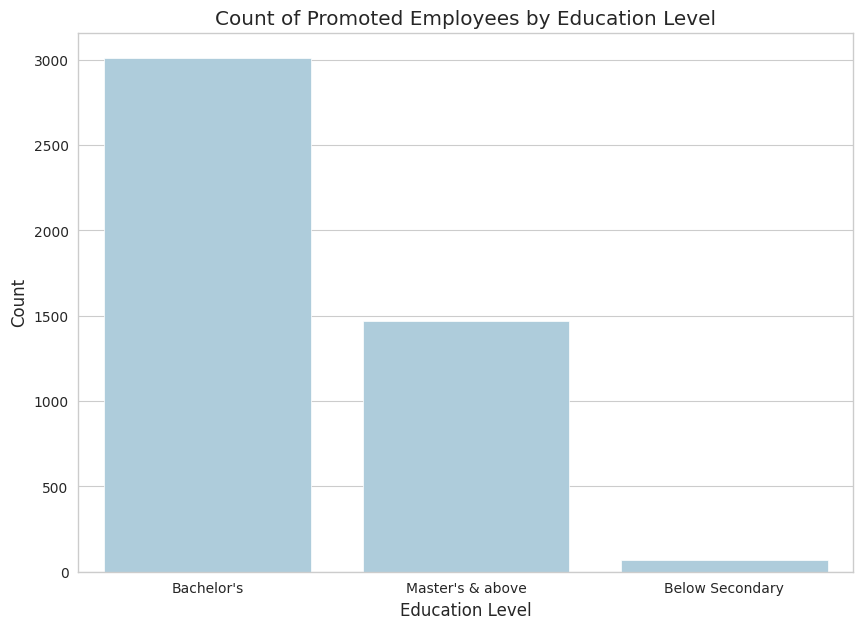

In [58]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
color = ["#a6cee3"]
sns.set_style("whitegrid")
sns.countplot(data=edulevel_promoted, x='education', palette=color)
plt.xlabel('Education Level')
plt.ylabel('Count')
plt.title('Count of Promoted Employees by Education Level')
plt.show()

In [59]:
edulevel_promoted.groupby('education').value_counts()

education         is_promoted
Bachelor's        1              3008
Below Secondary   1                67
Master's & above  1              1471
dtype: int64

#Question 10: Which region having highest number of promotion?

In [60]:
df_subset = df[['region', 'is_promoted']]
df_subset

,region,is_promoted
0,region_7,0
1,region_22,0
2,region_19,0
3,region_23,0
4,region_26,0
...,...,...
54803,region_14,0
54804,region_27,0
54805,region_1,0
54806,region_9,0


In [61]:
region_promoted = df_subset[df_subset['is_promoted'] == 1]
region_promoted

,region,is_promoted
11,region_7,1
39,region_28,1
60,region_4,1
66,region_22,1
67,region_22,1
...,...,...
54734,region_15,1
54757,region_7,1
54761,region_13,1
54792,region_14,1


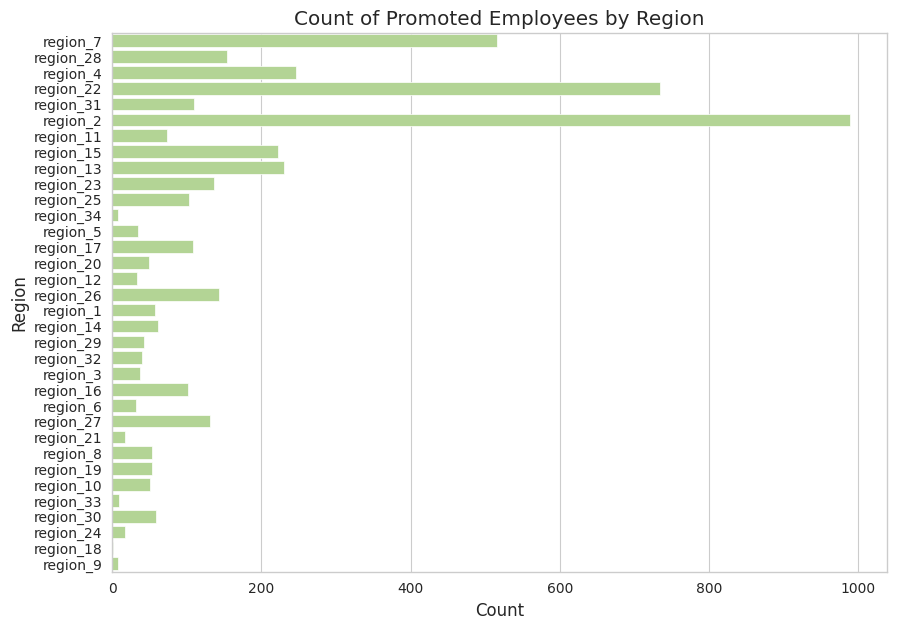

In [62]:
fig,ax = plt.subplots(1,1,figsize = (10,7))
color = ["#b2df8a"]
sns.countplot(region_promoted, y = 'region', palette = color)
plt.xlabel('Count')
plt.ylabel('Region')
plt.title('Count of Promoted Employees by Region')
plt.show()

In [63]:
region_promoted.groupby('region').value_counts()

region     is_promoted
region_1   1               58
region_10  1               51
region_11  1               74
region_12  1               33
region_13  1              230
region_14  1               62
region_15  1              222
region_16  1              102
region_17  1              109
region_18  1                1
region_19  1               53
region_2   1              989
region_20  1               49
region_21  1               18
region_22  1              734
region_23  1              137
region_24  1               18
region_25  1              103
region_26  1              143
region_27  1              131
region_28  1              154
region_29  1               43
region_3   1               37
region_30  1               59
region_31  1              110
region_32  1               40
region_33  1               10
region_34  1                8
region_4   1              246
region_5   1               35
region_6   1               32
region_7   1              516
region_8   1     

# Question 11: Correlation between Age, Education, Length of Service, Department, KPIs met >80% to being promoted

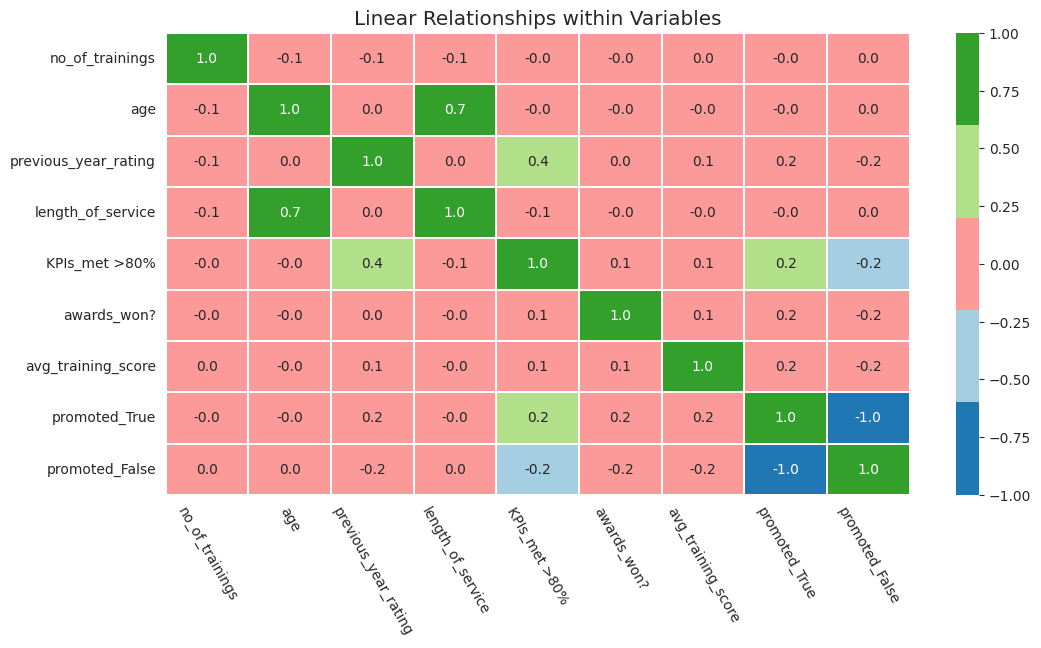

In [72]:
df['promoted_True'] = np.where(df['is_promoted']==1,1,0)
df['promoted_False'] = np.where(df['is_promoted']==0,1,0)

outcome_var = ['promoted_True','promoted_False']
numerical = ['no_of_trainings', 'age', 'previous_year_rating', 'length_of_service', 'KPIs_met >80%', 'awards_won?', 'avg_training_score']

variables = numerical+outcome_var
lin_correlations = df[variables].corr(method='pearson')

fig,ax = plt.subplots(figsize = (12,6))
custom_hue = ["#1f78b4","#a6cee3", "#fb9a99","#b2df8a", "#33a02c"]
sns.heatmap(lin_correlations,annot=True,fmt='1.1f',linewidth=1.1,cmap=custom_hue,ax=ax)
ax.tick_params(axis='x', rotation=300)
plt.title('Linear Relationships within Variables')
plt.show()